ECE 449 Lab D41

Submitted by: Priyanka Goradia

Student ID: 1669487


---



# **1. Data Collection**

**1.1 Importing necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

**1.2 Importing the Wisconsin Breast Cancer dataset**

In [ ]:
# Reading the data
dataFrame = pd.read_csv('/content/wdbc.csv', header = None)

# **2. Data Cleaning**

**2.1 Checking for Missing Data**

In [ ]:
# Finding missing values in the dataset
missing_values = dataFrame.isnull()
# Calculating the total number of missing values for each column and adding them up
total_no_of_missing_values = missing_values.sum().sum()
print(total_no_of_missing_values)

0


There are no missing values in the dataset!

**2.2 Performing Mean Amputation**

For the cases where a modified version of the dataset is to be used (with some missing values)

In [ ]:
# Reaplacing the null values in the dataset with the mean value of the feature
dataFrame.fillna(dataFrame.mean(), inplace = True)

<ipython-input-4-a211e8e0a0b4>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataFrame.fillna(dataFrame.mean(), inplace = True)


In [ ]:
# Verifying that the missing values have been filled up by mean
# Prints the no. of missing values in the dataset after mean imputation
# (expected 0 for the dataset with no missing values)
print((dataFrame.isnull()).sum().sum())

0


# **3. Data Labelling**

In [ ]:
print(dataFrame.columns)

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
           dtype='int64')


**3.1 Assigning Column Names**

In [ ]:
# Assigning names to the columns
columns = [
'ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]
dataFrame.columns = columns
print(dataFrame.columns)

Index(['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


**3.2 Transforming Data Lables**

In [ ]:
dataFrame["Diagnosis"] = dataFrame["Diagnosis"].replace({'M': 1, 'B': 0})
print(dataFrame["Diagnosis"])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64


# **4. Data Pre-Processing**

**4.1 Dropping Unrequired Columns**

In [ ]:
# Dropping the ID attribute
dataFrame = dataFrame.drop('ID', axis = 1)
print(dataFrame.columns)

Index(['Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1',
       'smoothness1', 'compactness1', 'concavity1', 'concave_points1',
       'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2',
       'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3'],
      dtype='object')


**4.2 Analyzing the Basic Statistics of Each Attribute**



In [ ]:
#Analysing the basic statistics of each attribute
# 1st quartile (25th percentile)
# 2nd quartile (Median or 50th percentile)
# 3rd quartile (75th percentile)
# minimum and maximum are calculated as a part of the describe() function
basic_statistics = dataFrame.describe(percentiles= [0.25, 0.50, 0.75])

In [ ]:
basic_statistics = basic_statistics.drop(['count', 'mean', 'std'])

4.2.1 Box and Whisker Plots of the Basic Statistics for Each Attribute

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4529: RuntimeWarning: invalid value encountered in multiply
  lerp_interpolation = asanyarray(add(a, diff_b_a * t, out=out))


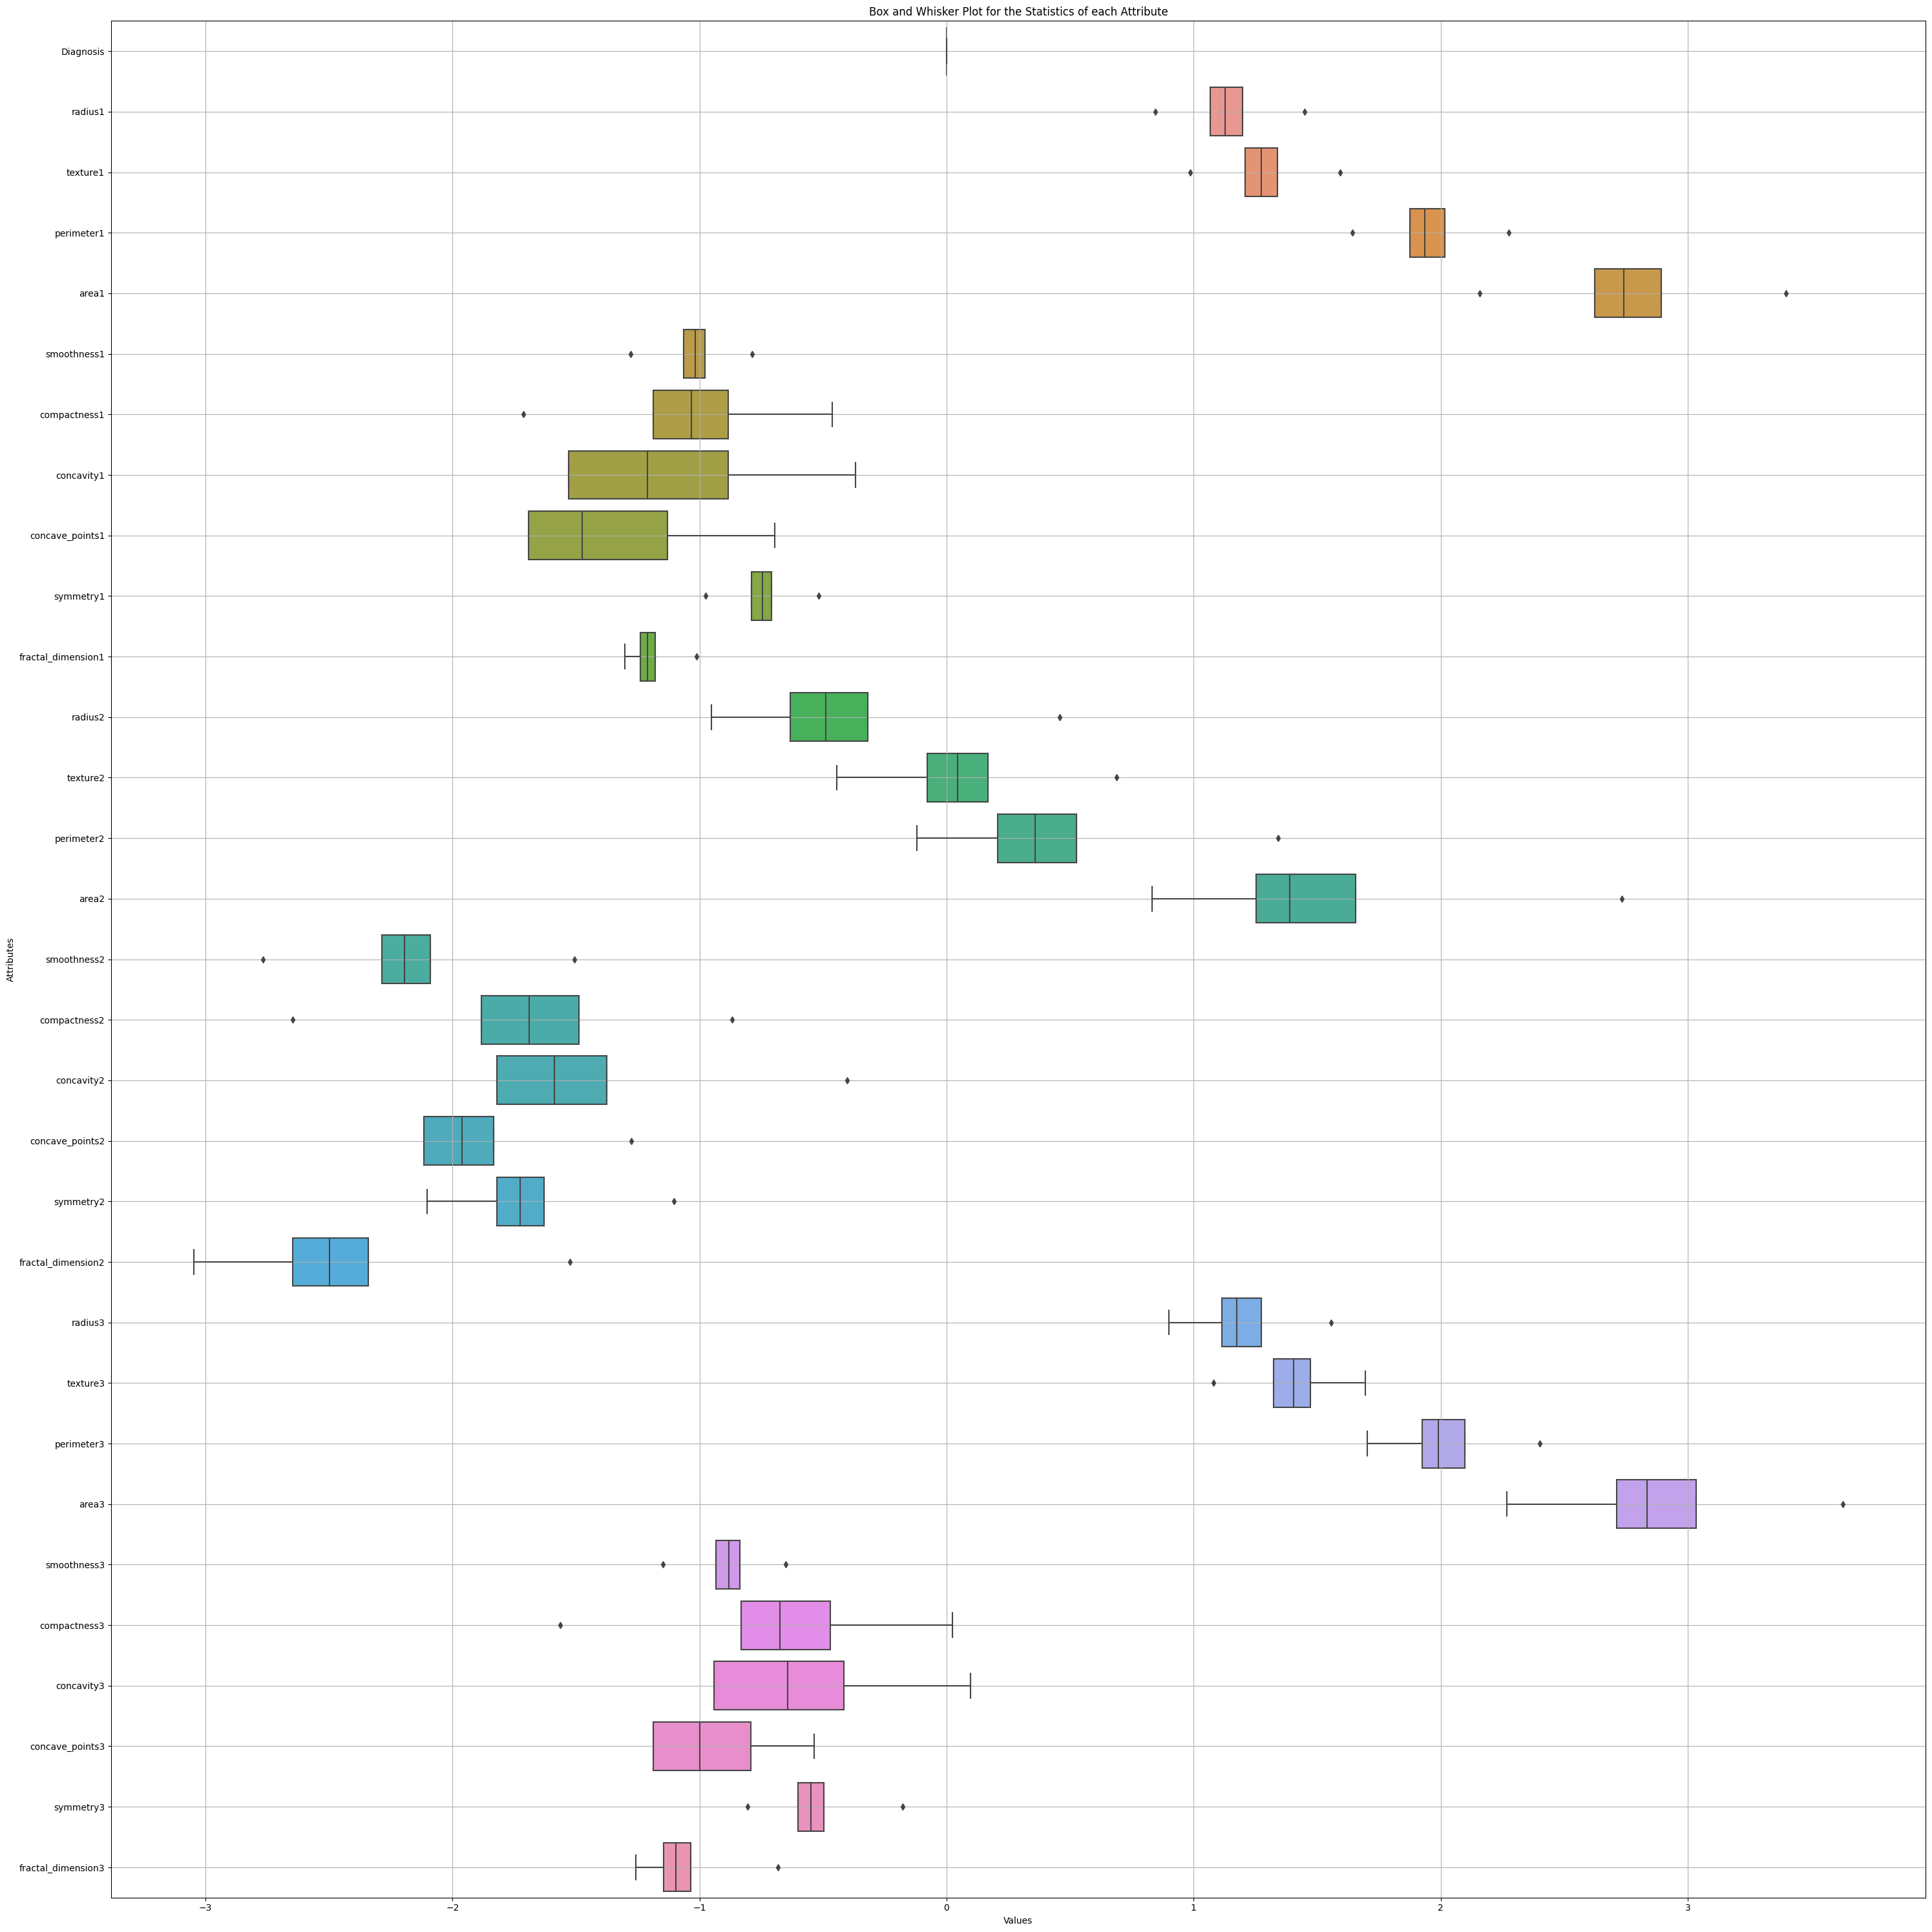

In [ ]:
#visualising the statistics for each attribute using side by side box and whisker plots for each attribute

#setting up the figure
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
ax = sns.boxplot(data=np.log10(basic_statistics), orient='h')
plt.title('Box and Whisker Plot for the Statistics of each Attribute')
plt.xlabel('Values')
plt.ylabel('Attributes')
plt.grid('True')

# Display the plot
plt.tight_layout()
plt.show()

**4.3 Re-Scaling Data: Min-Max Scaling**

In [ ]:
#identifying the columns with numeric values
numeric_columns = dataFrame.select_dtypes(include=['number']).columns
# performing Min-Max scaling using MinMaxScaler()
scaled_dataFrame = dataFrame.copy(deep=True)
scaled_dataFrame[numeric_columns] = MinMaxScaler().fit_transform(dataFrame[numeric_columns])

# Manual Min-Max Scaling
# performing Min-Max scaling using the min and max values of each attribute
# scaled_dataFrame = dataFrame.copy(deep=True)
# for column in numeric_columns:
#   scaled_dataFrame[column] = (dataFrame[column] - minimum[column]) / (maximum[column] - minimum[column])

In [ ]:
print(scaled_dataFrame)

     Diagnosis   radius1  texture1  perimeter1     area1  smoothness1  \
0          1.0  0.521037  0.022658    0.545989  0.363733     0.593753   
1          1.0  0.643144  0.272574    0.615783  0.501591     0.289880   
2          1.0  0.601496  0.390260    0.595743  0.449417     0.514309   
3          1.0  0.210090  0.360839    0.233501  0.102906     0.811321   
4          1.0  0.629893  0.156578    0.630986  0.489290     0.430351   
..         ...       ...       ...         ...       ...          ...   
564        1.0  0.690000  0.428813    0.678668  0.566490     0.526948   
565        1.0  0.622320  0.626987    0.604036  0.474019     0.407782   
566        1.0  0.455251  0.621238    0.445788  0.303118     0.288165   
567        1.0  0.644564  0.663510    0.665538  0.475716     0.588336   
568        0.0  0.036869  0.501522    0.028540  0.015907     0.000000   

     compactness1  concavity1  concave_points1  symmetry1  ...   radius3  \
0        0.792037    0.703140         0.731113 

# **5. Parameter Exploration**

**5.1 Spliting into training and testing sets**

In [ ]:
# Randomly splitting the dataset into training and testing set
# X: Features , y: Target Label
X = scaled_dataFrame.drop('Diagnosis',axis=1)
y = scaled_dataFrame['Diagnosis']
# Training size = 80%, Testing size = 20%
# Stratify property is set to 'yes'
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

**5.2 Using the Knn classifier**

In [ ]:
# Initializing variables
# k_val: k values for the knn classifier
# f1_scores:
k_val = np.arange(1,11)
f1_scores = {}

for k in k_val:
  knn_classifier = KNeighborsClassifier(n_neighbors=k)
  knn_classifier.fit(X_train, y_train)
  y_prediction = knn_classifier.predict(X_test)
  f1 = f1_score(y_test, y_prediction)
  f1_scores[k] = f1

#**6. Performance Evaluation**

**6.1 Validation Curve for Knn-Classifier**

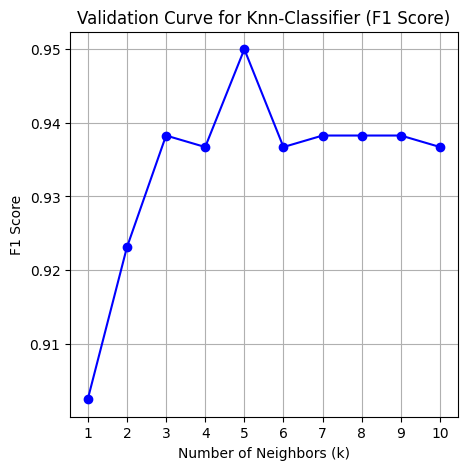

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(k_val, f1_scores.values(), marker='o', linestyle='-', color='b')
plt.title('Validation Curve for Knn-Classifier (F1 Score)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.xticks(k_val)
plt.show()

**6.2 Optimal K**

In [ ]:
# optimal k is the one with the maximum f1 score
optimal_k = max(f1_scores, key=f1_scores.get)
print("Optimal k value is:",optimal_k)

5


# Conclusion

*   A high F1 score indicates that for k=5, we have the perfect balance between precision and recall. (This can be seen in the Validation Curve for the Knn-Classifier)
*   We can conclude that the optimal value of k for this dataset is ***k=5*** since this is associated with the maximum f1 value.
*   Thus for k=5, iour classifier will use an optimal balance of precision and recall for the binary classification of breast cancer into malignant and benign classes.

